In [2]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"


In [1]:
from modules.uploadData import *
from modules.getData import *

zip_data("gd_dataset")
# get_data_from_github("goose_ducks_dataset")

data directory exists.
data\zip directory exists.
data\zip\gd_dataset directory exists.
data\zip\gd_dataset\train directory exists.
data\zip\gd_dataset\test directory exists.
Did not find data\zip\gd_dataset\train\duck, creating one...
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duc

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001

In [4]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
from modules.data_setup import create_dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir = "data/gd_dataset/test",
    test_dir = "data/gd_dataset/train",
    batch_size=32,
    train_transform=train_transform,
    test_transform=test_transform
)

In [6]:
from modules.model_builder_SimpleCNN import SimpleCNN
torch.manual_seed(42)
model_2 = SimpleCNN(input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

model_2

SimpleCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                                 lr=LEARNING_RATE,
                                 weight_decay=1e-4)

In [8]:
from modules import engine
model_2_results = engine.train(
        model=model_2, 
        train_dataloader=train_dataloader, 
        test_dataloader=test_dataloader, 
        optimizer=optimizer,
        loss_fn=loss_fn, 
        epochs=NUM_EPOCHS,
        device=device
    )

c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


  5%|▌         | 1/20 [00:12<03:48, 12.01s/it]

Epoch: 1  | Train Loss: 2.7673  | Train Accuracy: 0.2656  | Test Loss: 0.7264  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 10%|█         | 2/20 [00:22<03:23, 11.30s/it]

Epoch: 2  | Train Loss: 0.8463  | Train Accuracy: 0.4531  | Test Loss: 0.7598  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 15%|█▌        | 3/20 [00:34<03:12, 11.29s/it]

Epoch: 3  | Train Loss: 0.7679  | Train Accuracy: 0.4844  | Test Loss: 0.7041  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 20%|██        | 4/20 [00:46<03:05, 11.61s/it]

Epoch: 4  | Train Loss: 0.6967  | Train Accuracy: 0.5938  | Test Loss: 0.6947  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 25%|██▌       | 5/20 [00:58<03:00, 12.01s/it]

Epoch: 5  | Train Loss: 0.7070  | Train Accuracy: 0.4062  | Test Loss: 0.6935  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 30%|███       | 6/20 [01:10<02:44, 11.78s/it]

Epoch: 6  | Train Loss: 0.6916  | Train Accuracy: 0.4688  | Test Loss: 0.6935  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 35%|███▌      | 7/20 [01:22<02:33, 11.80s/it]

Epoch: 7  | Train Loss: 0.6950  | Train Accuracy: 0.3906  | Test Loss: 0.6934  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 40%|████      | 8/20 [01:33<02:19, 11.65s/it]

Epoch: 8  | Train Loss: 0.6894  | Train Accuracy: 0.5938  | Test Loss: 0.6938  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 45%|████▌     | 9/20 [01:45<02:08, 11.72s/it]

Epoch: 9  | Train Loss: 0.6953  | Train Accuracy: 0.5000  | Test Loss: 0.6938  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 50%|█████     | 10/20 [01:58<02:02, 12.20s/it]

Epoch: 10  | Train Loss: 0.6943  | Train Accuracy: 0.5000  | Test Loss: 0.6938  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 55%|█████▌    | 11/20 [02:10<01:48, 12.08s/it]

Epoch: 11  | Train Loss: 0.6956  | Train Accuracy: 0.5000  | Test Loss: 0.6938  | Test Accuracy: 0.5000
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([8, 10, 32, 32])
torch.Size([8, 20, 16, 16])
torch.Size([8, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])
torch.Size([32, 10, 32, 32])
torch.Size([32, 20, 16, 16])
torch.Size([32, 2])


 55%|█████▌    | 11/20 [02:21<01:55, 12.85s/it]

Epoch: 12  | Train Loss: 0.6890  | Train Accuracy: 0.5469  | Test Loss: 0.6938  | Test Accuracy: 0.5000
Early stopping triggered!


In [9]:
from modules.utils import save_model

save_model(
    model=model_2, 
    target_directory="models", 
    model_name="model_2_SimpleCNN.pth",
    )

Saving model to models\model_2_SimpleCNN.pth


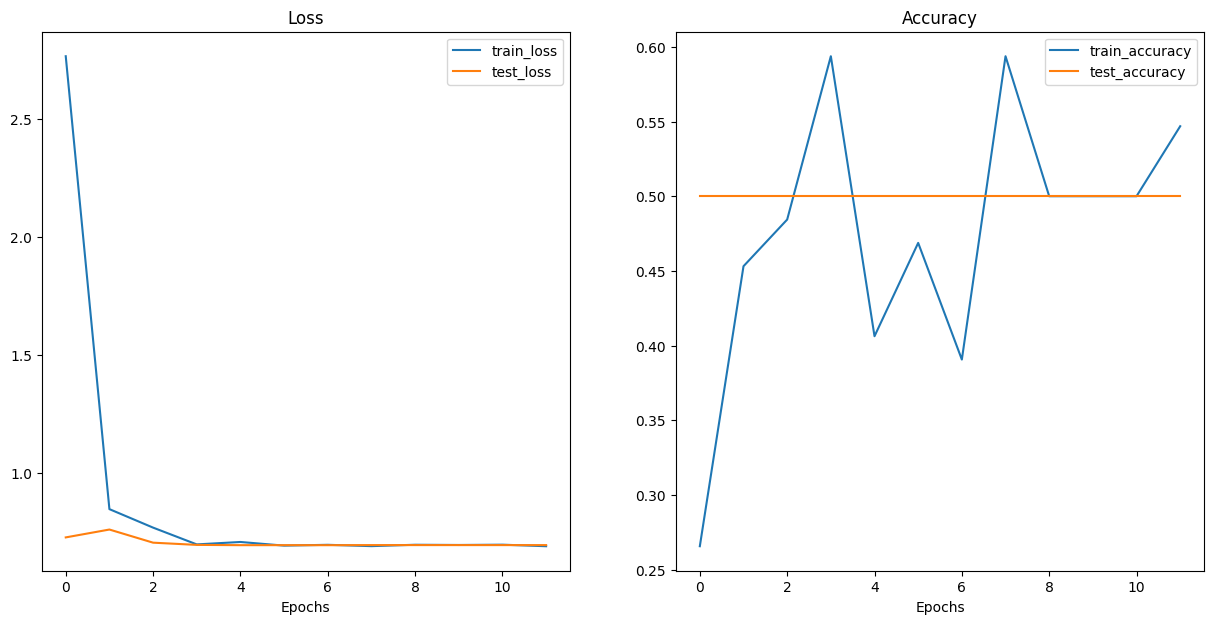

In [10]:
from modules.plots import plot_loss_curves


plot_loss_curves(model_2_results)

torch.Size([1, 10, 32, 32])
torch.Size([1, 20, 16, 16])
torch.Size([1, 2])


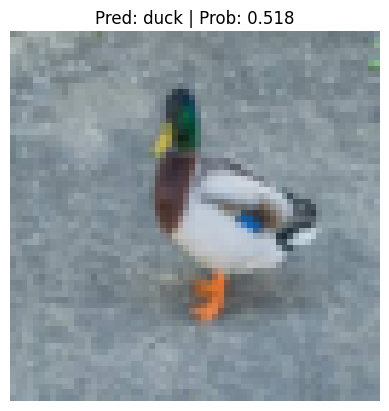

In [15]:
from modules.plots import pred_and_plot_image
import torch

custom_image_path = "data/my_ducky2.jpg"
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)